## **Platform churn prediction**

# EDA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["font.size"] = 12

In [ ]:
df = pd.read_csv("Telco Customer Churn.csv")
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


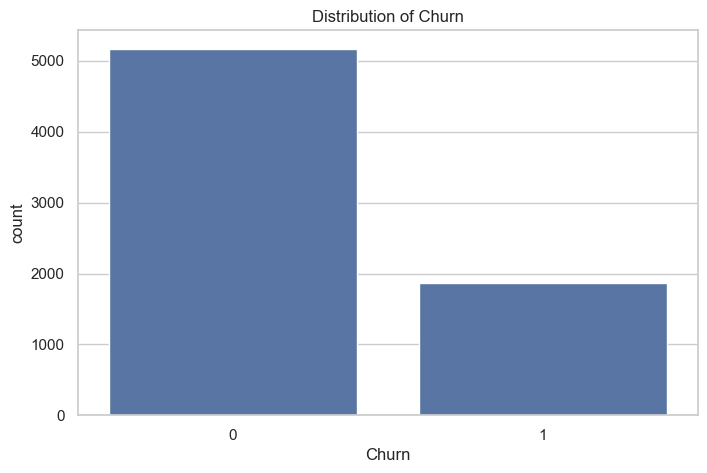

In [12]:
sns.countplot(x="Churn", data=df)
plt.title("Distribution of Churn")
plt.show()

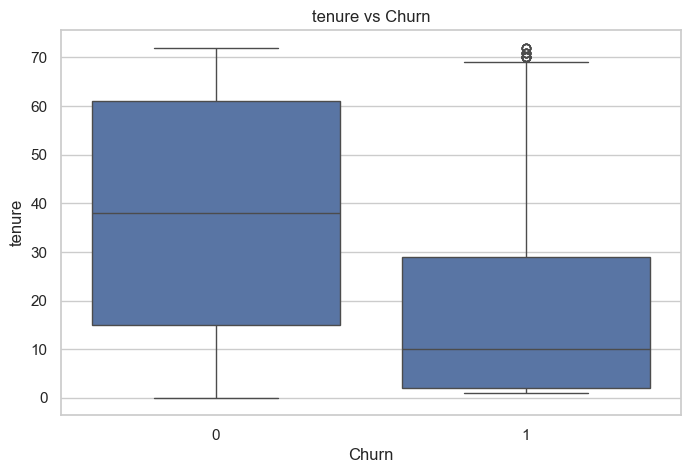

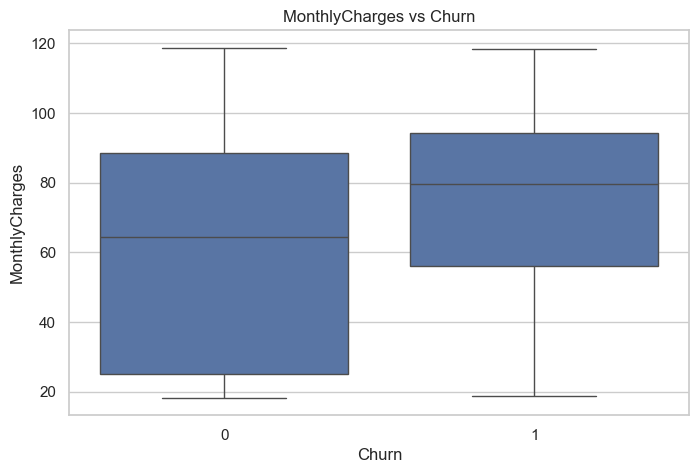

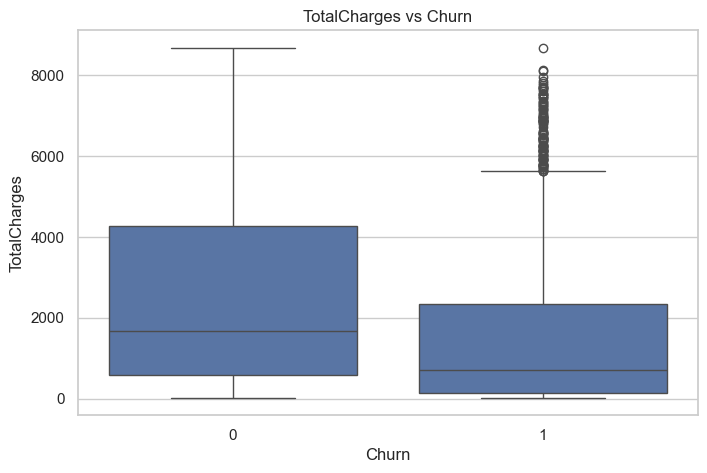

In [ ]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    sns.boxplot(x="Churn", y=col, data=df)
    plt.title(f"{col} vs Churn")
    plt.show()


Churn rate by gender:

Churn          0         1
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603

Churn rate by SeniorCitizen:

Churn                 0         1
SeniorCitizen                    
0              0.763938  0.236062
1              0.583187  0.416813

Churn rate by Partner:

Churn           0         1
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649

Churn rate by Dependents:

Churn              0         1
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502

Churn rate by PhoneService:

Churn                0         1
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096

Churn rate by MultipleLines:

Churn                    0         1
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099

Churn rate by InternetService:

C

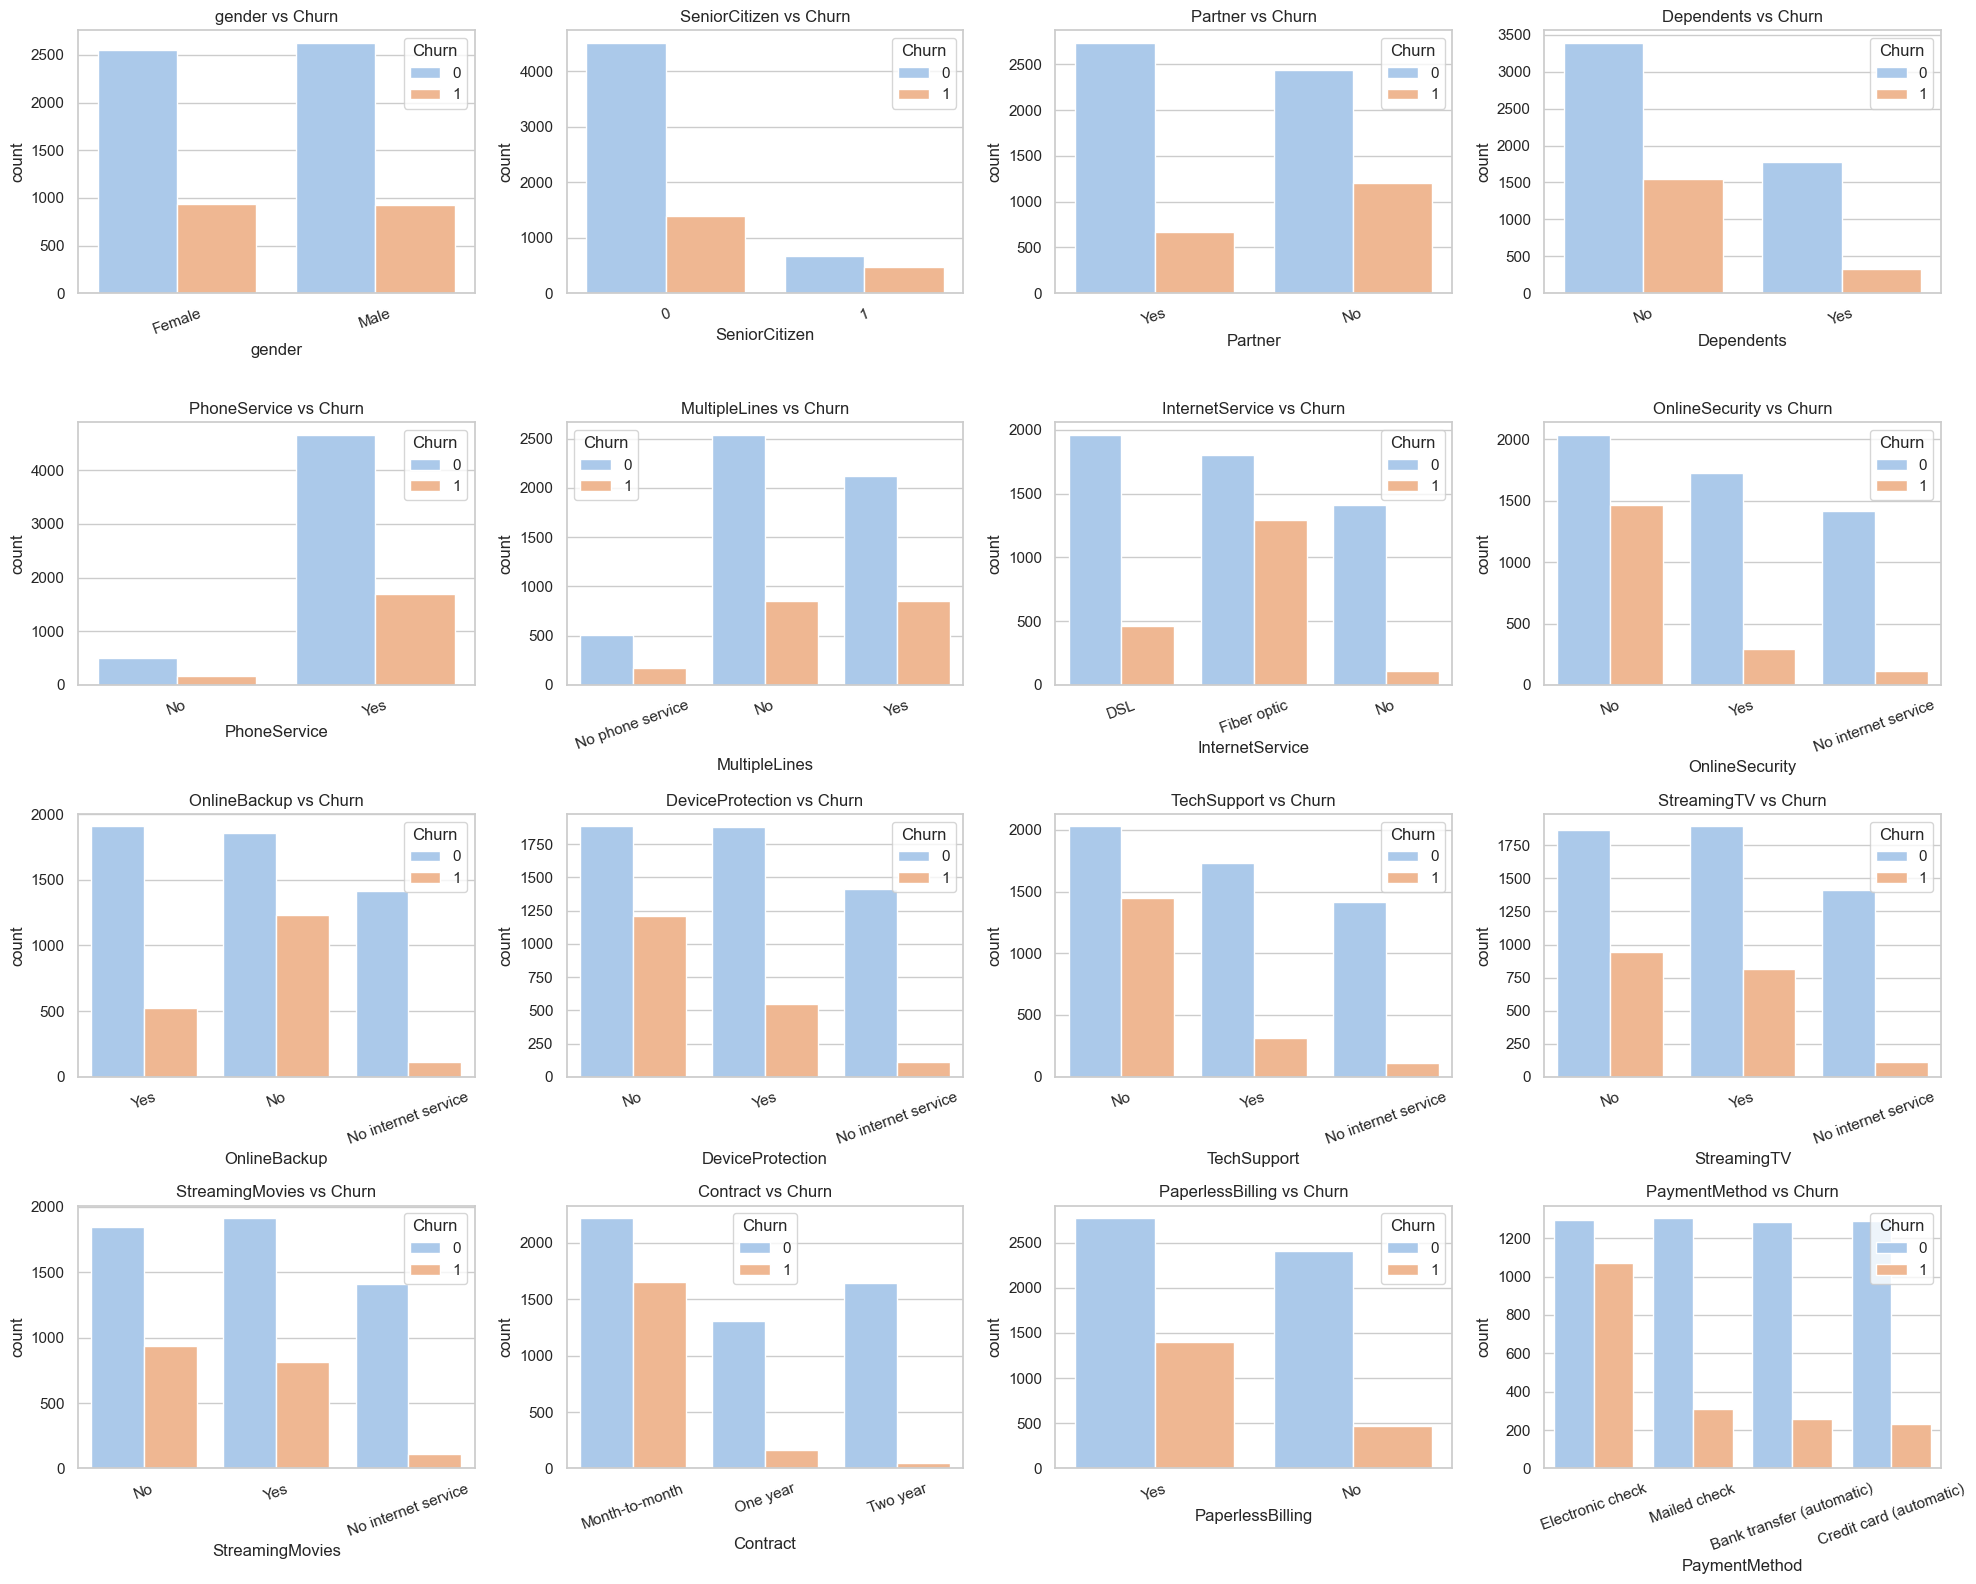

In [ ]:
import math

categorical_cols = ["gender","SeniorCitizen","Partner","Dependents",
                    "PhoneService","MultipleLines","InternetService",
                    "OnlineSecurity","OnlineBackup","DeviceProtection",
                    "TechSupport","StreamingTV","StreamingMovies",
                    "Contract","PaperlessBilling","PaymentMethod"]

n_cols_per_row = 4
n_rows = math.ceil(len(categorical_cols) / n_cols_per_row)

fig, axes = plt.subplots(n_rows, n_cols_per_row, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    print(f"\nChurn rate by {col}:\n")
    print(pd.crosstab(df[col], df["Churn"], normalize="index"))

    sns.countplot(x=col, hue="Churn", data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].tick_params(axis='x', rotation=20)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
